In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
cd=pd.read_csv('covid19dataset.csv')

In [5]:
cd

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [13]:
cd['Country_Region'].value_counts()

US    58
Name: Country_Region, dtype: int64

In [20]:
cd=cd.replace(np.NaN,cd['People_Hospitalized'].mean())

In [21]:
cd

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.318200,-86.902300,13052,522,4897.454545,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,USA,5063.940017,4897.454545
2,American Samoa,US,2020-05-21 02:32:54,-14.271000,-170.132000,0,0,4897.454545,0.0,60,0.000000,1.240000e+02,4897.454545,4897.454545,16,ASM,222.857246,4897.454545
3,Arizona,US,2020-05-21 02:32:54,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.116200,-119.681600,85997,3497,4897.454545,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,USA,3492.893832,4897.454545
6,Colorado,US,2020-05-21 02:32:54,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,USA,4663.552976,4897.454545
9,Diamond Princess,US,2020-05-21 02:32:54,4897.454545,4897.454545,49,0,4897.454545,49.0,88888,4897.454545,4.897455e+03,4897.454545,0.000000,84088888,USA,4897.454545,4897.454545


In [22]:
cd.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

we have dealt with NaN values and will start EDA now

In [23]:
cd.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [25]:
cd.shape

(58, 18)

In [26]:
cd.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,204.447484,86.609288,26756.086207,1611.017241,6425.366771,20070.724138,3288.086207,551.445417,2.182342e+05,4897.454545,88.820253,7.676194e+07,3928.782307,2119.132198
std,894.704841,918.406098,52562.031122,4084.750891,9946.897681,41294.705318,17408.350591,918.075279,2.962991e+05,9879.577790,642.485375,2.378302e+07,1907.908606,2439.342359
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.166725e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,39.191200,-86.797300,10148.500000,385.000000,4710.227273,5644.500000,32.500000,259.009335,1.334500e+05,4897.454545,4.409323,8.400003e+07,3501.526835,18.920611
75%,43.183950,-75.830850,29395.500000,1394.250000,4897.454545,19291.250000,47.750000,521.859755,2.620348e+05,4897.454545,5.530335,8.400004e+07,4897.454545,4897.454545
max,4897.454545,4897.454545,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,4897.454545,1.505836e+06,76410.000000,4897.454545,8.410000e+07,11377.424693,4897.454545


total count is 58, deaths, confirmed, recovered, in these cases mean is higher than median so outliers might be present 

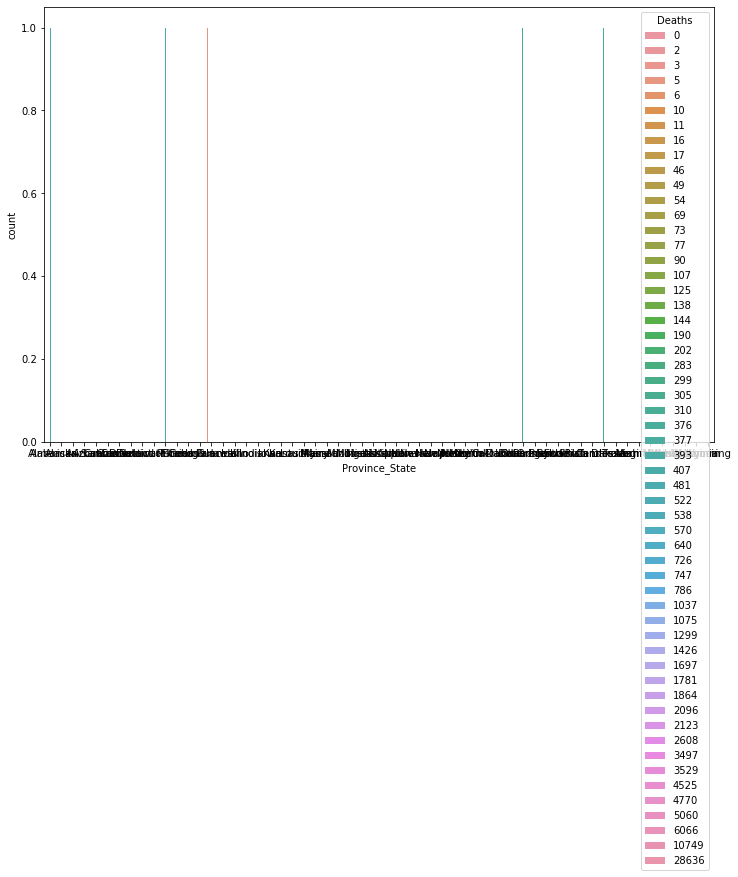

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='Province_State',hue='Deaths',data=cd)

In [35]:
corr=cd.corr()

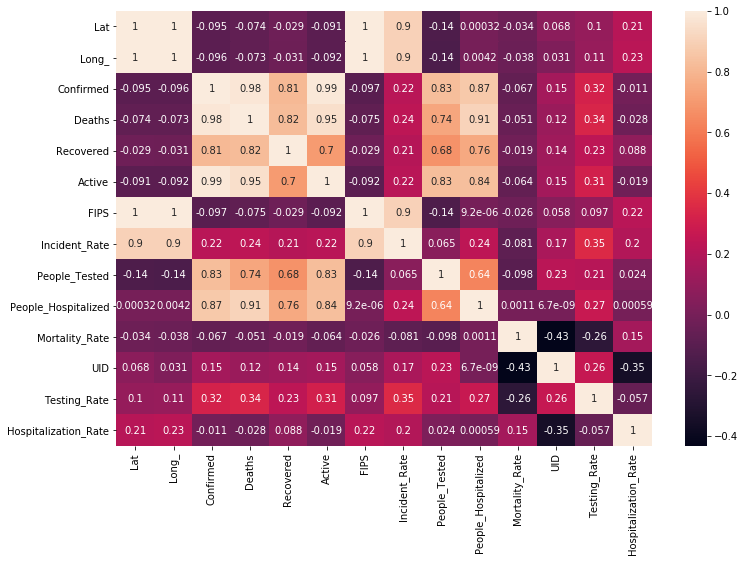

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

people hospitalized,people tested,active and recovered are highy correlated with target variable

In [40]:
#bi variate analysis

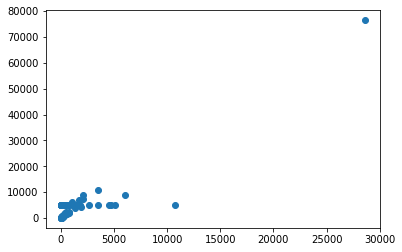

In [44]:
plt.scatter(cd['Deaths'],cd['People_Hospitalized'])

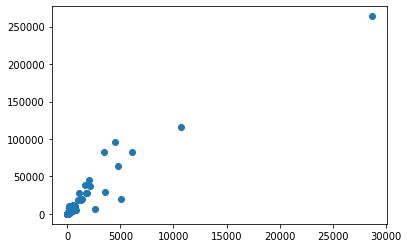

In [45]:
plt.scatter(cd['Deaths'],cd['Active'])

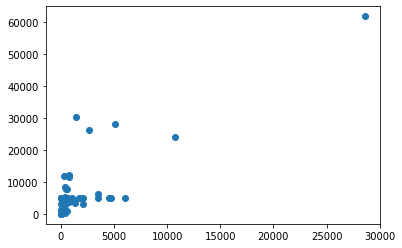

In [46]:
plt.scatter(cd['Deaths'],cd['Recovered'])

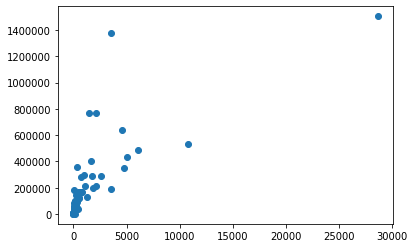

In [47]:
plt.scatter(cd['Deaths'],cd['People_Tested'])

people tested positive were more when compared to deaths

Province_State            Deaths
Alabama                   522       1
Alaska                    10        1
American Samoa            0         1
Arizona                   747       1
Arkansas                  107       1
California                3497      1
Colorado                  1299      1
Connecticut               3529      1
Delaware                  310       1
Diamond Princess          0         1
District of Columbia      407       1
Florida                   2096      1
Georgia                   1697      1
Grand Princess            3         1
Guam                      5         1
Hawaii                    17        1
Idaho                     77        1
Illinois                  4525      1
Indiana                   1864      1
Iowa                      393       1
Kansas                    202       1
Kentucky                  376       1
Louisiana                 2608      1
Maine                     73        1
Maryland                  2123      1
Massachusetts    

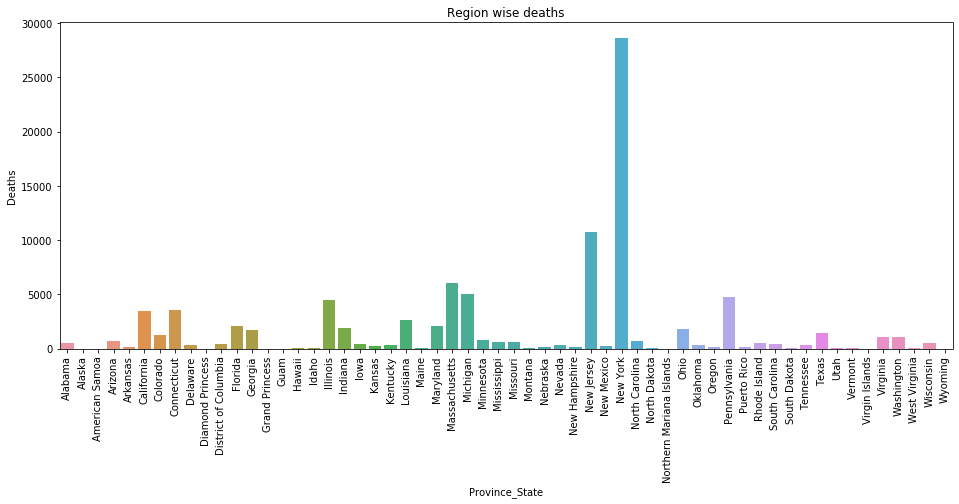

In [56]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title( 'Region wise deaths')
sns.barplot(x='Province_State',y='Deaths', data=cd)
print(cd.groupby('Province_State')['Deaths'].value_counts())


New york and new jersey had more deaths when compared to other states

Province_State            Recovered   
Alabama                   4897.454545     1
Alaska                    352.000000      1
American Samoa            4897.454545     1
Arizona                   3773.000000     1
Arkansas                  3852.000000     1
California                4897.454545     1
Colorado                  3478.000000     1
Connecticut               6264.000000     1
Delaware                  3965.000000     1
Diamond Princess          4897.454545     1
District of Columbia      1059.000000     1
Florida                   4897.454545     1
Georgia                   4897.454545     1
Grand Princess            4897.454545     1
Guam                      125.000000      1
Hawaii                    578.000000      1
Idaho                     1668.000000     1
Illinois                  4897.454545     1
Indiana                   4897.454545     1
Iowa                      8362.000000     1
Kansas                    473.000000      1
Kentucky                  2826.000000

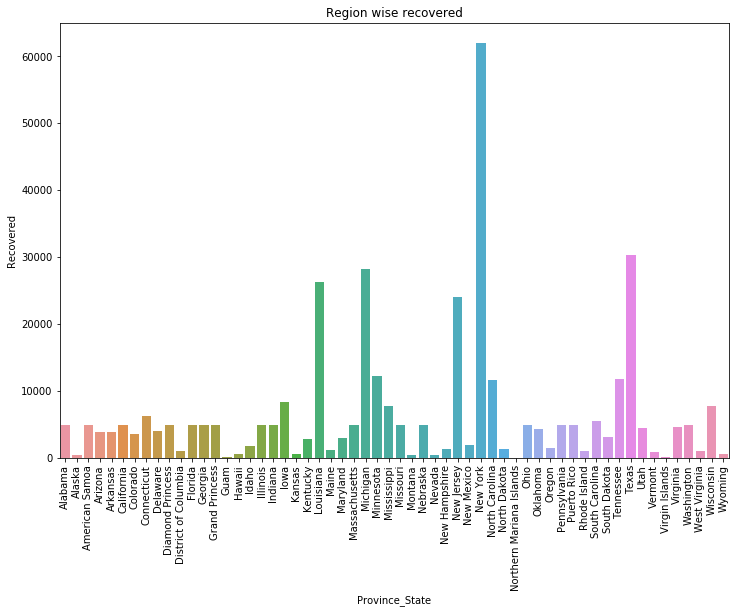

In [60]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.title( 'Region wise recovered')
sns.barplot(x='Province_State',y='Recovered', data=cd)
print(cd.groupby('Province_State')['Recovered'].value_counts())


new york, texas and michingan had very good recovery rate  

Province_State            Active  
Alabama                   12530.0     1
Alaska                    39.0        1
American Samoa            0.0         1
Arizona                   10386.0     1
Arkansas                  1044.0      1
California                82500.0     1
Colorado                  18020.0     1
Connecticut               29224.0     1
Delaware                  3919.0      1
Diamond Princess          49.0        1
District of Columbia      6085.0      1
Florida                   45375.0     1
Georgia                   38104.0     1
Grand Princess            100.0       1
Guam                      24.0        1
Hawaii                    48.0        1
Idaho                     761.0       1
Illinois                  95893.0     1
Indiana                   27410.0     1
Iowa                      6865.0      1
Kansas                    7832.0      1
Kentucky                  4965.0      1
Louisiana                 6459.0      1
Maine                     646.0       1
Maryl

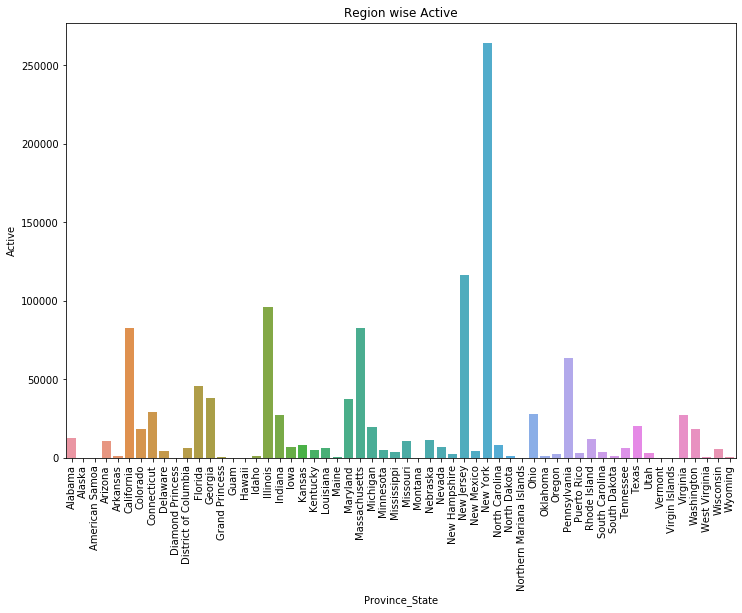

In [61]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.title( 'Region wise Active')
sns.barplot(x='Province_State',y='Active', data=cd)
print(cd.groupby('Province_State')['Active'].value_counts())


new york and new jersey have more active cases till date

In [62]:
#checking for outliers in dataset

Lat                        AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Long_                   AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Confirmed               AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Deaths                  AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Recovered               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Active                  AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
FIPS                    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Incident_Rate                 AxesSubplot(0.125,0.125;0.0945122x0.343182)
People_Tested              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
People_Hospitalized        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Mortality_Rate             AxesSubplot(0.465244,0.125;0.0945122x0.343182)
UID                        AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Testing_Rate               AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Hospitalization_Rate       AxesSubplot

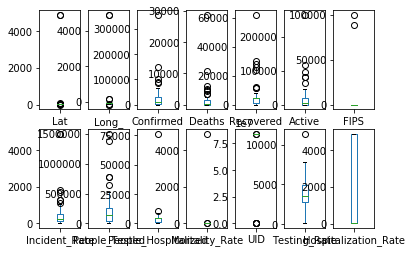

In [65]:
cd.plot(kind='box',subplots=True, layout=(2,7))

hence its clear that there are outliers present, so we will use z score method to remove it.

In [67]:
cd

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.318200,-86.902300,13052,522,4897.454545,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,USA,5063.940017,4897.454545
2,American Samoa,US,2020-05-21 02:32:54,-14.271000,-170.132000,0,0,4897.454545,0.0,60,0.000000,1.240000e+02,4897.454545,4897.454545,16,ASM,222.857246,4897.454545
3,Arizona,US,2020-05-21 02:32:54,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.116200,-119.681600,85997,3497,4897.454545,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,USA,3492.893832,4897.454545
6,Colorado,US,2020-05-21 02:32:54,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,USA,4663.552976,4897.454545
9,Diamond Princess,US,2020-05-21 02:32:54,4897.454545,4897.454545,49,0,4897.454545,49.0,88888,4897.454545,4.897455e+03,4897.454545,0.000000,84088888,USA,4897.454545,4897.454545


In [73]:
cd.drop(['Country_Region','Last_Update'],axis=1,inplace=True)

KeyError: "['Country_Region' 'Last_Update'] not found in axis"

we have removed country region,iso3,lat,long,last_update ,dropped these columns as it was not much correlated with target variable

In [75]:
cd

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,4897.454545,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,3353.942386,11.438860
1,Alaska,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,5063.940017,4897.454545
2,American Samoa,0,0,4897.454545,0.0,60,0.000000,1.240000e+02,4897.454545,4897.454545,16,222.857246,4897.454545
3,Arizona,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,2272.859351,12.022005
4,Arkansas,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,3189.670370,10.693584
5,California,85997,3497,4897.454545,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,3492.893832,4897.454545
6,Colorado,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,2289.339188,17.348774
7,Connecticut,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,5349.302875,28.054438
8,Delaware,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,4663.552976,4897.454545
9,Diamond Princess,49,0,4897.454545,49.0,88888,4897.454545,4.897455e+03,4897.454545,0.000000,84088888,4897.454545,4897.454545


In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cd['Province_State']=le.fit_transform(cd['Province_State'])
cd['Province_State']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
Name: Province_State, dtype: int32

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(cd))
z

array([[1.70244092e+00, 2.62999251e-01, 2.68934023e-01, 1.54948481e-01,
        1.84202386e-01, 1.90471516e-01, 3.13419200e-01, 1.83105472e-01,
        3.47604767e-01, 1.33172952e-01, 3.06995177e-01, 3.03924648e-01,
        8.71587984e-01],
       [1.64270615e+00, 5.05788407e-01, 3.95372994e-01, 6.15911662e-01,
        4.89328519e-01, 1.90413571e-01, 5.45671359e-01, 6.16848753e-01,
        0.00000000e+00, 1.35536852e-01, 3.06995220e-01, 6.00171275e-01,
        1.14891115e+00],
       [1.58297138e+00, 5.13484119e-01, 3.97842505e-01, 1.54948481e-01,
        4.90281199e-01, 1.87052738e-01, 6.05899798e-01, 7.42544257e-01,
        0.00000000e+00, 7.54979348e+00, 3.25578286e+00, 1.95936630e+00,
        1.14891115e+00],
       [1.52323661e+00, 2.27418578e-01, 2.13370022e-01, 2.68981553e-01,
        2.36575329e-01, 1.90297680e-01, 3.80888379e-01, 1.79752094e-01,
        3.17075993e-01, 1.31584034e-01, 3.06995304e-01, 8.75506004e-01,
        8.71346838e-01],
       [1.46350184e+00, 4.17470037e-

In [86]:
threshold=3
print(np.where(z>3))


(array([ 2,  2,  5,  9,  9, 13, 13, 14, 36, 36, 36, 36, 36, 36, 39, 44, 45,
       52], dtype=int64), array([ 9, 10,  7,  5,  6,  5,  6, 10,  1,  2,  3,  4,  7,  8, 10, 10, 11,
       10], dtype=int64))


In [88]:
cd_new=cd[(z<3).all(axis=1)]

print(cd.shape,'\t',cd_new.shape)



ValueError: Item wrong length 58 instead of 48.

In [90]:
cd

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,0,13052,522,4897.454545,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,3353.942386,11.438860
1,1,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,5063.940017,4897.454545
3,3,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,2272.859351,12.022005
4,4,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,3189.670370,10.693584
6,6,22797,1299,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,2289.339188,17.348774
7,7,39017,3529,6264.000000,29224.0,9,1094.357902,190718.0,10946.000000,9.044775,84000009,5349.302875,28.054438
8,8,8194,310,3965.000000,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,4663.552976,4897.454545
10,10,7551,407,1059.000000,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,84000011,5727.106946,4897.454545
11,11,47471,2096,4897.454545,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,3591.383953,18.819911
12,12,39801,1697,4897.454545,38104.0,13,374.864974,402940.0,7107.000000,4.263712,84000013,3795.082856,17.856335


In [91]:
cd.skew()

Province_State          0.009702
Confirmed               2.491174
Deaths                  2.886378
Recovered               2.352015
Active                  2.456746
FIPS                    0.022061
Incident_Rate           1.971490
People_Tested           1.638366
People_Hospitalized     0.536486
Mortality_Rate          0.472381
UID                     0.022061
Testing_Rate            1.099428
Hospitalization_Rate    0.629692
dtype: float64

In [93]:
x=cd.drop(['Deaths'],axis=1)
x

,Province_State,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,0,13052,4897.454545,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,3353.942386,11.438860
1,1,401,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,5063.940017,4897.454545
3,3,14906,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,2272.859351,12.022005
4,4,5003,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,3189.670370,10.693584
6,6,22797,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,2289.339188,17.348774
7,7,39017,6264.000000,29224.0,9,1094.357902,190718.0,10946.000000,9.044775,84000009,5349.302875,28.054438
8,8,8194,3965.000000,3919.0,10,841.476990,45412.0,4897.454545,3.783256,84000010,4663.552976,4897.454545
10,10,7551,1059.000000,6085.0,11,1069.927127,40419.0,4897.454545,5.390015,84000011,5727.106946,4897.454545
11,11,47471,4897.454545,45375.0,12,221.024217,771348.0,8934.000000,4.415327,84000012,3591.383953,18.819911
12,12,39801,4897.454545,38104.0,13,374.864974,402940.0,7107.000000,4.263712,84000013,3795.082856,17.856335


In [95]:
y=cd['Deaths']
y

0       522
1        10
3       747
4       107
6      1299
7      3529
8       310
10      407
11     2096
12     1697
15       17
16       77
17     4525
18     1864
19      393
20      202
21      376
22     2608
23       73
24     2123
25     6066
26     5060
27      786
28      570
29      640
30       16
31      138
32      377
33      190
34    10749
35      283
37      726
38       49
40     1781
41      299
42      144
43     4770
46      407
47       46
48      305
49     1426
50       90
51       54
53     1075
54     1037
55       69
56      481
57       11
Name: Deaths, dtype: int64

In [96]:
from sklearn.preprocessing import power_transform
cd=power_transform(x,method='yeo-johnson')


Scaling the data using standard scaler

In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
z=sc.fit_transform(x)

In [108]:
z

array([[-1.76988513e+00, -3.34420334e-01, -1.47586975e-01,
        -1.66456156e-01, -1.78973307e+00, -3.57158709e-01,
        -1.95002218e-01, -7.44729107e-01, -1.88595914e-01,
        -1.78973307e+00, -3.49024322e-01, -7.41718574e-01],
       [-1.70894217e+00, -7.67998941e-01, -7.91716468e-01,
        -6.61494868e-01, -1.72576643e+00, -9.80051583e-01,
        -8.82516446e-01,  5.32110098e-01, -9.79469485e-01,
        -1.72576643e+00,  9.01154083e-01,  1.35037927e+00],
       [-1.58705625e+00, -2.70879528e-01, -3.06931729e-01,
        -2.51426374e-01, -1.59783317e+00, -5.38108891e-01,
        -1.89686873e-01, -6.32589287e-01,  3.42997246e-01,
        -1.59783317e+00, -1.13940358e+00, -7.41468883e-01],
       [-1.52611329e+00, -6.10277911e-01, -2.95736759e-01,
        -6.21665078e-01, -1.53386654e+00, -6.53052204e-01,
        -5.62985973e-01, -1.10402659e+00, -1.16596970e+00,
        -1.53386654e+00, -4.69123511e-01, -7.42037687e-01],
       [-1.40422737e+00, -4.36971562e-04, -3.4873573

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [110]:
x_train.shape

(36, 12)

In [111]:
y_train.shape

(36,)

In [112]:
x_test.shape

(12, 12)

In [113]:
y_test.shape

(12,)

In [115]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [116]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]

In [117]:
for m in model:
    m.fit(x_train,y_train)
    print('score of' ,m,'is:',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print('Error')
    print('mean_absolute_error', mean_absolute_error(y_test,pred))
    print('mean_squared_error', mean_squared_error(y_test,pred) )
    print('r2 score', r2_score(y_test,pred))  
    print('*************************************')
    print('\n')
                    

score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.9901561070590694
Error
mean_absolute_error 466.41827119557183
mean_squared_error 393295.9522098736
r2 score 0.7396621220461935
*************************************


score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 1.0
Error
mean_absolute_error 2246.0
mean_squared_error 16841820.0
r2 score -10.148255289798286
*************************************


score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='unifo

In [118]:
from sklearn.model_selection import cross_val_score
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('score of' ,m,'is:')
    print('score:',score)
    print('mean square', score.mean())
    print('standard deviation',score.std() )  
    print('*************************************')
    print('\n')


score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
score: [0.59326706 0.85315313 0.97143968 0.87689814]
mean square 0.8236895023140653
standard deviation 0.1401997485669369
*************************************


score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is:
score: [0.73798712 0.66164815 0.63992263 0.45048587]
mean square 0.6225109406784837
standard deviation 0.1057854650084591
*************************************


score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
               

using Ensemble Technique to boostup our score

In [131]:
#using random forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')

print('mean_absolute_error', mean_absolute_error(y_test,predrf))
print('mean_squared_error', mean_squared_error(y_test,predrf) )
print('root mean_squared_error', np.sqrt(mean_squared_error(y_test,predrf)))
print('r2 score', r2_score(y_test,predrf))  
print('*************************************')
print('\n')



0.9630890312332974


mean_absolute_error 676.5750000000002
mean_squared_error 1318620.6141666668
root mean_squared_error 1148.3120717673687
r2 score 0.12715376146279878
*************************************




In [133]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()
adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print(adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')

print('mean_absolute_error', mean_absolute_error(y_test,predadb))
print('mean_squared_error', mean_squared_error(y_test,predadb) )
print('root mean_squared_error', np.sqrt(mean_squared_error(y_test,predadb)))
print('r2 score', r2_score(y_test,predadb))  
print('*************************************')
print('\n')



0.9922845106440253


mean_absolute_error 462.23078068282763
mean_squared_error 406873.89669074636
root mean_squared_error 637.866676266088
r2 score 0.7306743528274584
*************************************




In [134]:
# AdaBoost is giving the best result so saving this model

In [135]:
from sklearn.externals import joblib
joblib.dump(adb,'covid19.pkl')

['covid19.pkl']